<a href="https://colab.research.google.com/github/AdityaPanda01/AdityaPanda01/blob/main/customerchurn_logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
churn_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_df.drop(columns="customerID",inplace=True)

In [ ]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<Axes: xlabel='Churn', ylabel='count'>

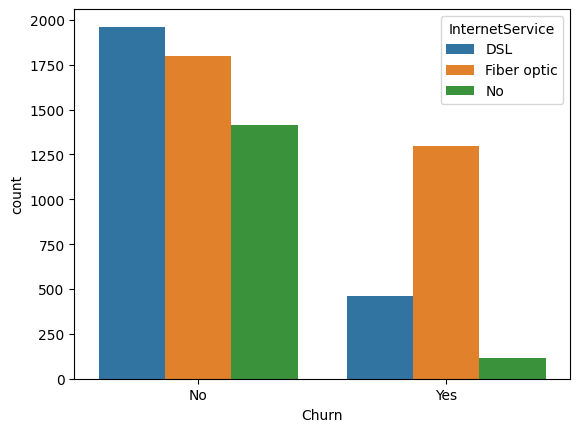

In [ ]:
sns.countplot(x='Churn',hue='InternetService',data=churn_df)

<Axes: xlabel='Churn', ylabel='count'>

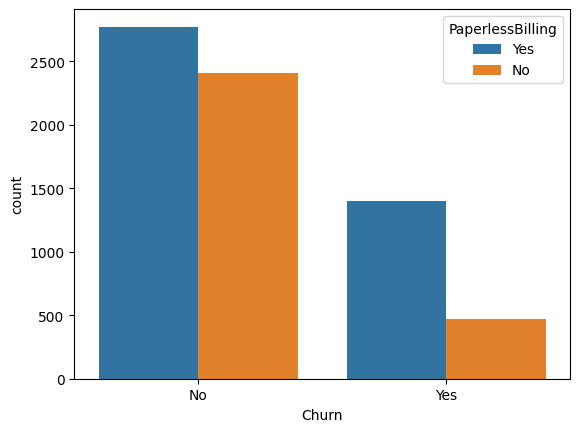

In [ ]:
sns.countplot(x='Churn',hue='PaperlessBilling',data=churn_df)

In [ ]:
churn_df.drop(columns="PaperlessBilling",inplace=True)

<Axes: xlabel='Churn', ylabel='count'>

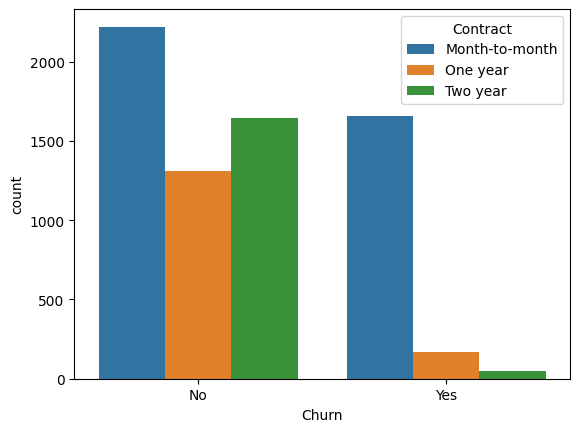

In [ ]:
sns.countplot(x='Churn',hue='Contract',data=churn_df)

In [ ]:
churn_df.replace({'Contract':{'Month-to-month':1,'One year':0,'Two year':0}},inplace=True)

<Axes: xlabel='Churn', ylabel='count'>

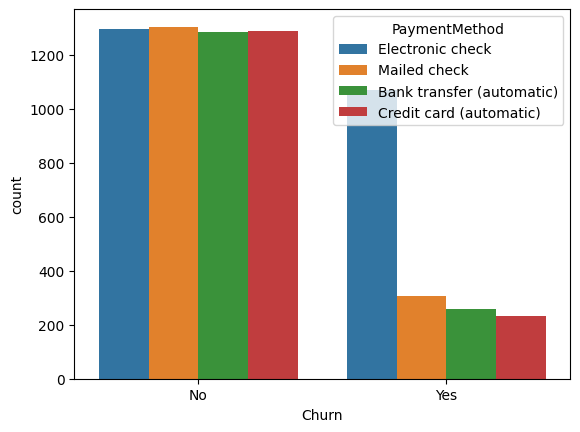

In [ ]:
sns.countplot(x='Churn',hue='PaymentMethod',data=churn_df)

In [ ]:
churn_df.replace({'PaymentMethod':{'Electronic check':1,'Mailed check':0,'Bank transfer (automatic)':0,'Credit card (automatic)':0}},inplace=True)

In [ ]:
churn_df.shape


(7043, 19)

In [ ]:
churn_df['OnlineBackup'].value_counts()


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [ ]:
churn_df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [ ]:
churn_df.replace("No internet service", 0,inplace=True)


In [ ]:
churn_df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,1,1,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,0,0,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,1,0,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,0,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,1,1,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,1,1,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,1,0,89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,1,0,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,1,1,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,0,0,56.15,3487.95,No


<Axes: xlabel='Churn', ylabel='count'>

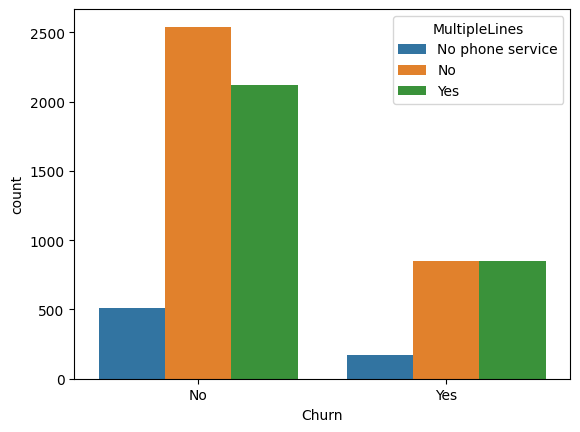

In [ ]:
sns.countplot(x='Churn',hue='MultipleLines',data=churn_df)

In [ ]:
churn_df.groupby(['MultipleLines', 'Churn']).size()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
dtype: int64

around 75 percent no churn in all the three

In [ ]:
churn_df.groupby(['OnlineBackup', 'Churn']).size()

OnlineBackup  Churn
0             No       1413
              Yes       113
No            No       1855
              Yes      1233
Yes           No       1906
              Yes       523
dtype: int64

No online backup has high churn

In [ ]:
churn_df.replace({'OnlineBackup':{'No':1,'Yes':0}},inplace=True)

In [ ]:
churn_df.groupby(['DeviceProtection', 'Churn']).size()

DeviceProtection  Churn
0                 No       1413
                  Yes       113
No                No       1884
                  Yes      1211
Yes               No       1877
                  Yes       545
dtype: int64

No device protection has high churn

In [ ]:
churn_df.replace({'DeviceProtection':{'No':1,'Yes':0}},inplace=True)

In [ ]:
churn_df.groupby(['PhoneService', 'Churn']).size()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
dtype: int64

75 percent for both so no major difference we can drop this  parameter

In [ ]:
churn_df.drop(columns="PhoneService",inplace=True)

In [ ]:
churn_df.groupby(['OnlineSecurity', 'Churn']).size()

OnlineSecurity  Churn
0               No       1413
                Yes       113
No              No       2037
                Yes      1461
Yes             No       1724
                Yes       295
dtype: int64

high churn in no omline security

In [ ]:
churn_df.replace({'OnlineSecurity':{'No':1,'Yes':0}},inplace=True)

In [ ]:
churn_df.groupby(['TechSupport', 'Churn']).size()

TechSupport  Churn
0            No       1413
             Yes       113
No           No       2027
             Yes      1446
Yes          No       1734
             Yes       310
dtype: int64

In [ ]:
churn_df.replace({'TechSupport':{'No':1,'Yes':0}},inplace=True)

In [ ]:
churn_df.groupby(['StreamingMovies', 'Churn']).size()

StreamingMovies  Churn
0                No       1413
                 Yes       113
No               No       1847
                 Yes       938
Yes              No       1914
                 Yes       818
dtype: int64

no major change

In [ ]:
churn_df.replace({'StreamingMovies':{'No':1,'Yes':2}},inplace=True)

In [ ]:
churn_df.groupby(['StreamingTV', 'Churn']).size()

StreamingTV  Churn
0            No       1413
             Yes       113
No           No       1868
             Yes       942
Yes          No       1893
             Yes       814
dtype: int64

no major change

In [ ]:
churn_df.replace({'StreamingTV':{'No':1,'Yes':2}},inplace=True)

In [ ]:
churn_df.groupby(['Partner', 'Churn']).size()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
dtype: int64

In [ ]:
churn_df.replace({'Partner':{'No':1,'Yes':0}},inplace=True)

In [ ]:
churn_df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,0,No,1,No phone service,DSL,1,0,1,1,1,1,1,1,29.85,29.85,No
1,Male,0,1,No,34,No,DSL,0,1,0,1,1,1,0,0,56.95,1889.5,No
2,Male,0,1,No,2,No,DSL,0,0,1,1,1,1,1,0,53.85,108.15,Yes
3,Male,0,1,No,45,No phone service,DSL,0,1,0,0,1,1,0,0,42.30,1840.75,No
4,Female,0,1,No,2,No,Fiber optic,1,1,1,1,1,1,1,1,70.70,151.65,Yes
5,Female,0,1,No,8,Yes,Fiber optic,1,1,0,1,2,2,1,1,99.65,820.5,Yes
6,Male,0,1,Yes,22,Yes,Fiber optic,1,0,1,1,2,1,1,0,89.10,1949.4,No
7,Female,0,1,No,10,No phone service,DSL,0,1,1,1,1,1,1,0,29.75,301.9,No
8,Female,0,0,No,28,Yes,Fiber optic,1,1,0,0,2,2,1,1,104.80,3046.05,Yes
9,Male,0,1,Yes,62,No,DSL,0,0,1,1,1,1,0,0,56.15,3487.95,No


In [ ]:
Lb=LabelEncoder()

In [ ]:
churn_df['gender']=Lb.fit_transform(churn_df['gender'])
churn_df['Dependents']=Lb.fit_transform(churn_df['Dependents'])
churn_df['MultipleLines']=Lb.fit_transform(churn_df['MultipleLines'])
churn_df['InternetService']=Lb.fit_transform(churn_df['InternetService'])
churn_df['Churn']=Lb.fit_transform(churn_df['Churn'])

In [ ]:
churn_df.head(50)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1,29.85,29.85,0
1,1,0,1,0,34,0,0,0,1,0,1,1,1,0,0,56.95,1889.5,0
2,1,0,1,0,2,0,0,0,0,1,1,1,1,1,0,53.85,108.15,1
3,1,0,1,0,45,1,0,0,1,0,0,1,1,0,0,42.30,1840.75,0
4,0,0,1,0,2,0,1,1,1,1,1,1,1,1,1,70.70,151.65,1
5,0,0,1,0,8,2,1,1,1,0,1,2,2,1,1,99.65,820.5,1
6,1,0,1,1,22,2,1,1,0,1,1,2,1,1,0,89.10,1949.4,0
7,0,0,1,0,10,1,0,0,1,1,1,1,1,1,0,29.75,301.9,0
8,0,0,0,0,28,2,1,1,1,0,0,2,2,1,1,104.80,3046.05,1
9,1,0,1,1,62,0,0,0,0,1,1,1,1,0,0,56.15,3487.95,0


In [ ]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_df.drop(columns="TotalCharges",inplace=True)

In [ ]:
X=churn_df.drop(columns="Churn")
Y=churn_df["Churn"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train.replace(' ', np.nan, inplace=True)

# Check data types of each column
column_data_types = X_train.dtypes
print(column_data_types)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaymentMethod         int64
MonthlyCharges      float64
dtype: object


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
acr=accuracy_score(Y_test,Y_pred)
cm=confusion_matrix(Y_test,Y_pred)

In [ ]:
print(acr)
print(cm)

0.801277501774308
[[952 109]
 [171 177]]
